In [1]:
import numpy as np
import sympy as smp

The function I am going to integrate is $y = x^2$ where $x$ is from 0 to 2. The value obtained after integration is 2.666.....

In [2]:
x = smp.Symbol('x')
y = smp.Function('y')(x)

y = x**2

In [3]:
I = smp.integrate(y, (x, 0, 2))
I

8/3

In [4]:
8/3

2.6666666666666665

In [5]:
xf = np.linspace(0, 2, 100)
yf = xf**2

This integration has been done using Monte Carlo method where samples has been taken uniformly (Uniform Distribution). Here $p(x) = 1/2 $.

In [6]:
def f(x):
  return x**2

def Monte_Carlo (f, a, b, N):
  x = np.random.uniform(a, b, N) # x will be sampled between points a and b uniformly, p(x) = 1/(b-a)
  y = f(x)
  return np.mean(y) * (b - a)

In [7]:
I_MC = Monte_Carlo(f, 0, 2, 10000)
I_MC

2.6685295631346078

This integration has been done using Monte Carlo method where samples has been taken such that the distribution of the sample is Gaussian.

In [8]:
def p(x):
  return (1/np.sqrt(2*np.pi*4)) * np.exp(-((x-1)**2)/8)

In [9]:
def Monte_Carlo_N (f,p, N):

    mean = 1  # Mean (center) of the distribution
    std_dev = 2  # Standard deviation (spread) of the distribution

    # Placeholder for accepted samples
    samples = []

    # Rejection sampling
    while len(samples) < N:

      sample = np.random.normal(loc=mean, scale=std_dev, size=N)
      accepted_samples = sample[(sample >= 0) & (sample <= 2)]
      samples.extend(accepted_samples)

    # If we have more than needed due to the last extend, we trim the list
    samples = np.array(samples[:N])
    y = f(samples)
    p = p(samples)

    return np.mean(y/p)

In [10]:
I_MC_N = Monte_Carlo_N(f, p, 10000)
I_MC_N

6.91038997833047

This is the correct Metropolis algorithm. I have considered 3 sampling functions P given by following:
$$ p(x) = 1/2 $$
$$ p1(x) = x/2 $$
$$ p2(x) = 3x^2/8$$
Obviously p2 gives better results than others since it is proportional to f.

In [11]:
import numpy as np

# Define the function f(x) = x^2
def f(x):
    return x**2

# Define the target distribution p(x), here we use a uniform distribution over [0, 1]
def p(x):
    if 0 <= x <= 2:

      return 1/2

    else:
        return 0

def p1(x):
    if 0 <= x <= 2:

      return x/2

    else:
        return 0

def p2(x):
    if 0 <= x <= 2:

      return 3 * x**2/8

    else:
        return 0

# Metropolis algorithm for sampling from the uniform distribution over [0, 1]
def metropolis_sampling(p, initial, num_samples, proposal_std):
    samples = []
    current = initial
    num_accept = 0

    for _ in range(num_samples):

        candidate = np.random.normal(current, proposal_std)

        # Ensure the candidate falls within the bounds [0, 2]
        if 0 <= candidate <= 2:
          acceptance_prob = min(1, p(candidate) / p(current))

          if np.random.uniform() < acceptance_prob:
            current = candidate
            num_accept += 1

        samples.append(current)

    return np.array(samples), num_accept

# Monte Carlo integration using samples
def monte_carlo_integration(samples, f):
    values_f = np.array([f(sample) for sample in samples])
    # values_p = np.array([p(sample) for sample in samples])
    # values = values_f / values_p
    return np.mean(values_f) * 2

def monte_carlo_integration_1(samples, f):
    values_f = np.array([f(sample) for sample in samples])
    values_p1 = np.array([p1(sample) for sample in samples])
    return np.mean(values_f/values_p1)

def monte_carlo_integration_2(samples, f):
    values_f = np.array([f(sample) for sample in samples])
    values_p2 = np.array([p2(sample) for sample in samples])
    return np.mean(values_f/values_p2)

# Parameters
initial = 0.88  # Initial guess
num_samples = 10000  # Number of samples
proposal_std = 2  # Standard deviation for proposal distribution

# Generate samples using Metropolis algorithm
samples, num_accept = metropolis_sampling(p, initial, num_samples, proposal_std)
samples1, num_accept1 = metropolis_sampling(p1, initial, num_samples, proposal_std)
samples2, num_accept2 = metropolis_sampling(p2, initial, num_samples, proposal_std)

# Perform Monte Carlo integration
integral = monte_carlo_integration(samples, f)
integral_1 = monte_carlo_integration_1(samples1, f)
integral_2 = monte_carlo_integration_2(samples2, f)

print("Estimated integral considering p, i.e a uniform distribution:", integral)
print("Estimated integral considering p1, i.e x/2:", integral_1)
print("Estimated integral considering p2, i.e 3x^2/8:", integral_2)
print('')
print("Acceptance rate considering p, i.e Uniform Distribution:", num_accept / num_samples)
print("Acceptance rate considering p1, i.e x/2:", num_accept1 / num_samples)
print("Acceptance rate considering p2, i.e 3/8 x^2:", num_accept2 / num_samples)

Estimated integral considering p, i.e a uniform distribution: 2.6392213538441176
Estimated integral considering p1, i.e x/2: 2.673311978568229
Estimated integral considering p2, i.e 3x^2/8: 2.666666666666666

Acceptance rate considering p, i.e Uniform Distribution: 0.368
Acceptance rate considering p1, i.e x/2: 0.252
Acceptance rate considering p2, i.e 3/8 x^2: 0.187


In [12]:
pf = np.array([p(x) for x in xf])
pf1 = np.array([p1(x) for x in xf])
pf2 = np.array([p2(x) for x in xf])

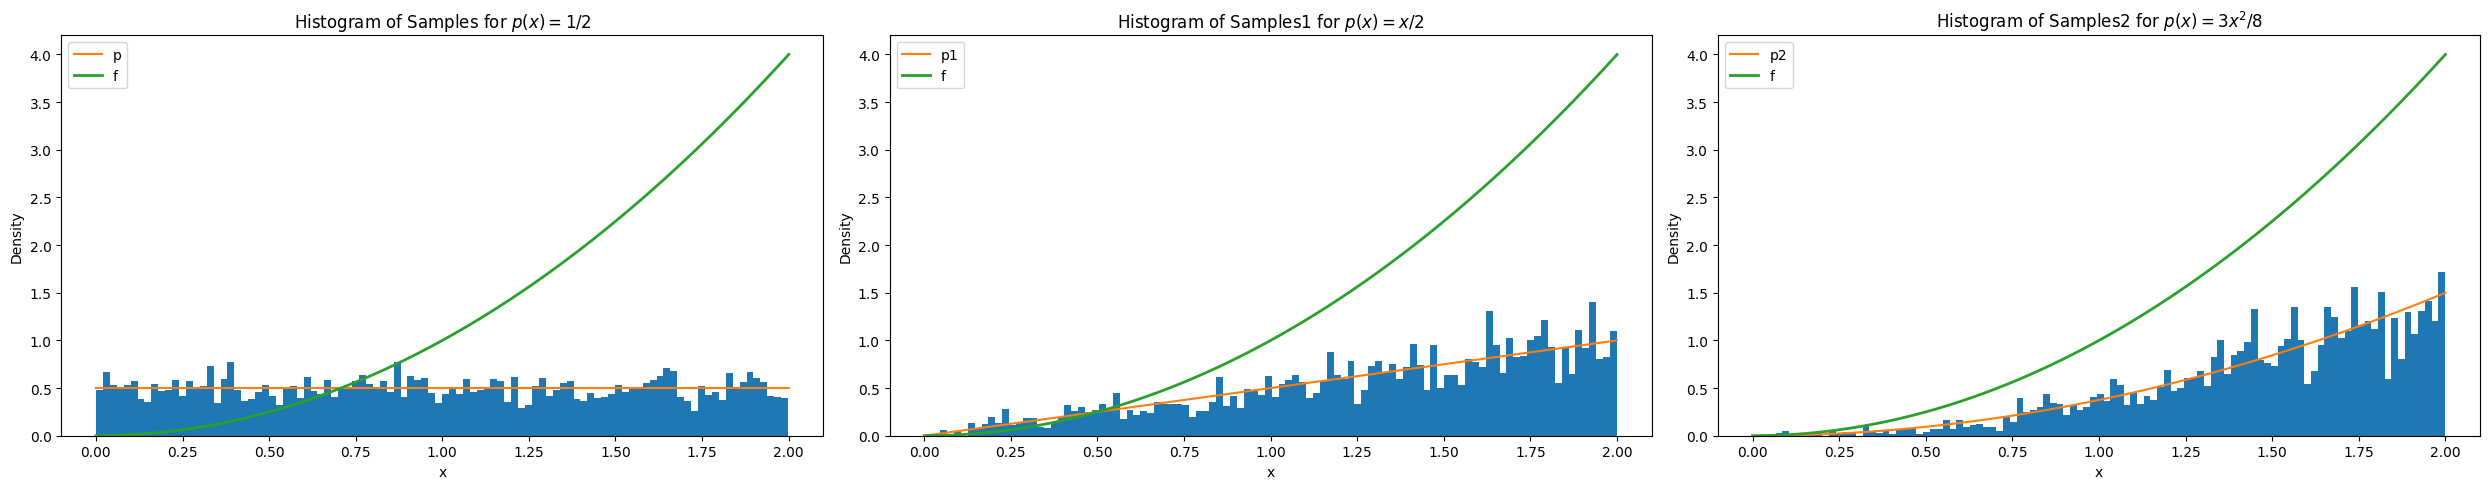

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3 ,figsize=(25,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot

samples = [samples, samples1, samples2]
functions = [pf, pf1, pf2]
titles_p = ['p', 'p1', 'p2']
titles = ['Histogram of Samples for $ p(x) = 1/2 $', 'Histogram of Samples1 for $ p(x) = x/2 $', 'Histogram of Samples2 for $ p(x)= 3x^{2}/8$']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.hist(samples[i], bins=100, density=True)
    ax.plot(xf, functions[i], label =titles_p[i])
    ax.plot(xf, yf, lw=2, label = 'f')
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()